In [301]:
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.cm
import numpy as np
import urllib.parse
import requests
import simplejson as json


%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [12]:
data_df = pd.read_csv("Existing_Commercial_Buildings_Energy_Performance_Ordinance_Report.csv")

In [14]:
data_df['Full.Address'][16]

'1001 COLUMBUS AVE\nSAN FRANCISCO, CA 94133\n(37.803867, -122.415419)'

In [15]:
data_df.columns
data_df['Building Address']
data_df = data_df.fillna('0')
data_df['lat'] = ""
data_df['long'] = ""
data_df.head()

,Parcel(s),Building Name,Building Address,Postal Code,Full.Address,Floor Area,Property Type - Self Selected,PIM Link,Benchmark 2017 Status,2017 Reason for Exemption,...,2011 Site EUI (kBtu/ft2),2011 Source EUI (kBtu/ft2),2011 Percent Better than National Median Site EUI,2011 Percent Better than National Median Source EUI,2011 Total GHG Emissions (Metric Tons CO2e),2011 Total GHG Emissions Intensity (kgCO2e/ft2),2011 Weather Normalized Site EUI (kBtu/ft2),2011 Weather Normalized Source EUI (kBtu/ft2),lat,long
0,5584/001B,Apparel Triangle,20 APPAREL WAY,94124,0,"34,537",Non-Refrigerated Warehouse,0,Violation - Did Not Report,0,...,0,0,0,0,0,0,0,0,,
1,3957/002,350 Rhode Island - North,350 Rhode Island - North,94103,"350 Rhode Island North\nSAN FRANCISCO, CA 94103\n","127,074",Other - Education,http://propertymap.sfplanning.org/?&search=395...,Complied,0,...,125,0,96,0,"1,160.87",0,123.6,0,,
2,5584/001A,Apparel Triangle,425-495 Barneveld Avenue,94124,0,"34,537",Non-Refrigerated Warehouse,0,Violation - Did Not Report,0,...,0,0,0,0,0,0,0,0,,
3,5587/004A,2222 PALOU AVE,2222 PALOU AVE,94124,0,"44,311",Non-Refrigerated Warehouse,0,Violation - Did Not Report,0,...,0,0,0,0,0,0,0,0,,
4,5587/004B,2160-2196 Palou Ave,2160 Palou Ave,94124,0,"44,311",0,0,Violation - Did Not Report,0,...,0,0,0,0,0,0,0,0,,


In [16]:
def geocode(address):
    params = { 'format'        :'json', 
               'addressdetails': 1, 
               'q'             : address}
    return requests.get('http://nominatim.openstreetmap.org/search', params=params)


k = range(len(data_df))
for address,building_address,i,pin in zip(data_df['Full.Address'],data_df['Building Address'],k,data_df['Postal Code']):
    if len(address.split("(")) >1:
        temp = address.split("(")[1]
        lati,longi = temp.split(",")
        longi = longi[:-1]
        #print(lati,longi)
        data_df.loc[i,'lat'] = lati
        data_df.loc[i,'long'] = longi
    else:
        #if address == '0':
        address = building_address
        address += ", San Francisco,"+str(pin)
        #print(address)
        response = geocode(address)
        if len(response.json()) != 0:
            #continue
            #print("----")
            data_df.loc[i,'lat'] = response.json()[0]['lat']
            data_df.loc[i,'long'] = response.json()[0]['lon']
            

In [17]:
data_df.to_csv("energy_with_location.csv")

In [112]:
df = pd.read_csv("energy_with_location.csv")
df.head()

,Unnamed: 0,Parcel(s),Building Name,Building Address,Postal Code,Full.Address,Floor Area,Property Type - Self Selected,PIM Link,Benchmark 2017 Status,...,2011 Site EUI (kBtu/ft2),2011 Source EUI (kBtu/ft2),2011 Percent Better than National Median Site EUI,2011 Percent Better than National Median Source EUI,2011 Total GHG Emissions (Metric Tons CO2e),2011 Total GHG Emissions Intensity (kgCO2e/ft2),2011 Weather Normalized Site EUI (kBtu/ft2),2011 Weather Normalized Source EUI (kBtu/ft2),lat,long
0,0,5584/001B,Apparel Triangle,20 APPAREL WAY,94124,0,"34,537",Non-Refrigerated Warehouse,0,Violation - Did Not Report,...,0,0.0,0,0.0,0,0.0,0,0,37.740240,-122.402721
1,1,3957/002,350 Rhode Island - North,350 Rhode Island - North,94103,"350 Rhode Island North\nSAN FRANCISCO, CA 94103\n","127,074",Other - Education,http://propertymap.sfplanning.org/?&search=395...,Complied,...,125,0.0,96,0.0,"1,160.87",0.0,123.6,0,37.765388,-122.403103
2,2,5584/001A,Apparel Triangle,425-495 Barneveld Avenue,94124,0,"34,537",Non-Refrigerated Warehouse,0,Violation - Did Not Report,...,0,0.0,0,0.0,0,0.0,0,0,NaN,NaN
3,3,5587/004A,2222 PALOU AVE,2222 PALOU AVE,94124,0,"44,311",Non-Refrigerated Warehouse,0,Violation - Did Not Report,...,0,0.0,0,0.0,0,0.0,0,0,37.740549,-122.401790
4,4,5587/004B,2160-2196 Palou Ave,2160 Palou Ave,94124,0,"44,311",0,0,Violation - Did Not Report,...,0,0.0,0,0.0,0,0.0,0,0,37.739940,-122.401016


In [172]:
#df.dropna(subset=['lat'])

In [20]:
new_df = df.dropna(subset=['lat'])
len(new_df)


1631

In [385]:

def replaceComma(pos):
    return pos.replace(",","")
new_df['2016 Site EUI (kBtu/ft2)']=new_df['2016 Site EUI (kBtu/ft2)'].apply(replaceComma)
new_df['Floor Area']=new_df['Floor Area'].apply(replaceComma)
new_df['Floor Area'] = pd.to_numeric(new_df['Floor Area'])
new_df['2016 Site EUI (kBtu/ft2)']=pd.to_numeric(new_df['2016 Site EUI (kBtu/ft2)'])
#new_df.head()

def normalize(feature_name,df):
    max_value = df[feature_name].max()
    min_value = df[feature_name].min()
    return (df[feature_name] - min_value) / (max_value - min_value)


new_df['Normalized_FloorArea'] = Normalize('Floor Area',new_df)
new_df['Normalized_2016EUI'] = Normalize('2016 Site EUI (kBtu/ft2)',new_df)

AttributeError: 'float' object has no attribute 'replace'

In [ ]:
figf , ax = plt.subplots(figsize=(10,20))
m = Basemap(resolution='h', # c, l, i, h, f or None
            projection='merc',
            lat_0=37.76, lon_0=-122.42,
            llcrnrlon=-122.56473, llcrnrlat=37.692998, urcrnrlon=-122.34178, urcrnrlat=37.833429)
m.drawmapboundary(fill_color='#46bcec')
#m.drawcountries()
#m.drawstates()
m.fillcontinents(color='#f2f2f2',zorder=0)
m.drawcoastlines()
    
#new_df['Building Name'].apply(plot_area)    
for lat, long,area,cons  in zip(new_df['lat'],new_df['long'],new_df['Normalized_FloorArea'] ,new_df['2016 Site EUI (kBtu/ft2)']):     #print(lat,long)
    x, y = m(long,lat)
    size = area *120
    cons = cons *10
    #print(cons)
    #m.plot(x,y, 'o',markersize = size, color ='#444444', alpha=0.8)
    m.scatter(x,y, label=None,c=cons, cmap='viridis',s=size, alpha=0.8)

m.readshapefile('SF_Centrelines/geo_export_acea975e-e38d-45e2-a310-1bdb64c62d52', 'areas')
#     #break

# lat, lon = new_df['lat'], new_df['long']
# population, area = new_df['2016 Site EUI (kBtu/ft2)'], new_df['Floor Area']

# Scatter the points, using size and color but no label
# m.scatter(lon, lat, label=None,
#             c=population, cmap='viridis',
#             s=area, linewidth=0, alpha=1)
plt.savefig("SF_2016_E.png")

In [ ]:
#plt.colorbar()
plt.show()

In [76]:
df_partial = new_df.head(20)
df_partial['2016 Site EUI (kBtu/ft2)']

0      21.2
1     100.4
3      23.0
4      11.4
5      53.6
6     265.1
7      30.4
8       6.6
11      0.0
12    236.3
16      0.0
17     52.3
19      0.0
20    224.3
21     38.6
22      0.0
23      0.0
24    136.3
26     25.5
27      0.0
Name: 2016 Site EUI (kBtu/ft2), dtype: float64

In [5]:
import pandas as pd
import numpy as np
def normalize(feature_name,df):
    max_value = df[feature_name].max()
    min_value = df[feature_name].min()
    return (df[feature_name] - min_value) / (max_value - min_value)

ex_final = pd.read_csv('NOn empty Valued buildings.csv')
ex_final = ex_final[np.isfinite(ex_final['lat'])]
ex_final = ex_final[np.isfinite(ex_final['long'])]
ex_final['Normalized_FloorArea'] = normalize('Floor Area',ex_final)
ex_final.to_csv('energy_2016.csv', index=False)

In [8]:
import folium
import branca.colormap as cm
import time
from selenium import webdriver
from folium.plugins import HeatMap
import branca.colormap as cm

SF_COORDINATES = (37.76, -122.45)

#map_osm = folium.Map(prefer_canvas=True)
for year in ['2016 Site EUI (kBtu/ft2)','2015 Site EUI (kBtu/ft2)','2014 Site EUI (kBtu/ft2)','2013 Site EUI (kBtu/ft2)','2012 Site EUI (kBtu/ft2)']:
    map_osm = folium.Map(location=SF_COORDINATES, zoom_start=13)
    color_var = year #what variable will determine the color
    # cmap = cm.LinearColormap(['blue', 'red'],
    #                          vmin=new_df[color_var].quantile(0.05), vmax=new_df[color_var].quantile(0.95),
    #                          caption = color_var)
    cmap = cm.LinearColormap(['blue', 'red'],
                             vmin=ex_final[color_var].quantile(0.05), vmax=ex_final[color_var].quantile(0.95),
                             caption = color_var)

    def plotDot(df):
        '''input: series that contains a numeric named latitude and a numeric named longitude
        this function creates a CircleMarker and adds it to your this_map'''
        #print(df['Floor Area'])
        string = str(df['Building Name'])+'\n'+'Floor Area: '+str(df['Floor Area'])+'\n'+'Energy Consumption: '+str(df['2016 Site EUI (kBtu/ft2)'])
        popup = folium.Popup(string, parse_html=True)
        folium.CircleMarker(location=[df['lat'], df['long']],
                            radius= df['Normalized_FloorArea'] * 25,
                            weight=3,#remove outline
                            popup = popup,
                            fill=True,
                            color=cmap(df[color_var]),
                            fillcolor=cmap(df[color_var])).add_to(map_osm)


    #df_partial.apply(plotDot, axis = 1)  
    ex_final.apply(plotDot, axis = 1)
    map_osm.fit_bounds(map_osm.get_bounds())
    map_osm.add_child(cmap)

    map_osm.save('maps/map_'+str(year[:4])+'_Buildings.html')
#map_osm
#ex_final.apply(plotDot, axis = 1) 

In [113]:
df['2016 Site EUI (kBtu/ft2)']=df['2016 Site EUI (kBtu/ft2)'].apply(replaceComma)
df['Floor Area']=df['Floor Area'].apply(replaceComma)
df['Floor Area'] = pd.to_numeric(df['Floor Area'])
df['2016 Site EUI (kBtu/ft2)']=pd.to_numeric(df['2016 Site EUI (kBtu/ft2)'])

df['2015 Site EUI (kBtu/ft2)']=df['2015 Site EUI (kBtu/ft2)'].apply(replaceComma)
df['2015 Site EUI (kBtu/ft2)']=pd.to_numeric(df['2015 Site EUI (kBtu/ft2)'])

df['2014 Site EUI (kBtu/ft2)']=df['2014 Site EUI (kBtu/ft2)'].apply(replaceComma)
df['2014 Site EUI (kBtu/ft2)']=pd.to_numeric(df['2014 Site EUI (kBtu/ft2)'])

df['2013 Site EUI (kBtu/ft2)']=df['2013 Site EUI (kBtu/ft2)'].apply(replaceComma)
df['2013 Site EUI (kBtu/ft2)']=pd.to_numeric(df['2013 Site EUI (kBtu/ft2)'])

df['2012 Site EUI (kBtu/ft2)']=df['2012 Site EUI (kBtu/ft2)'].apply(replaceComma)
df['2012 Site EUI (kBtu/ft2)']=pd.to_numeric(df['2012 Site EUI (kBtu/ft2)'])

In [144]:
df['2011 Site EUI (kBtu/ft2)']=df['2011 Site EUI (kBtu/ft2)'].apply(replaceComma)
df['2011 Site EUI (kBtu/ft2)']=pd.to_numeric(df['2011 Site EUI (kBtu/ft2)'])

In [123]:
df['Total Site Energy 2016'] = df['2016 Site EUI (kBtu/ft2)'] * df['Floor Area']
df['Total Site Energy 2015'] = df['2015 Site EUI (kBtu/ft2)'] * df['Floor Area']
df['Total Site Energy 2014'] = df['2014 Site EUI (kBtu/ft2)'] * df['Floor Area']
df['Total Site Energy 2013'] = df['2013 Site EUI (kBtu/ft2)'] * df['Floor Area']

In [114]:
df.to_csv("cleaned_data.csv")

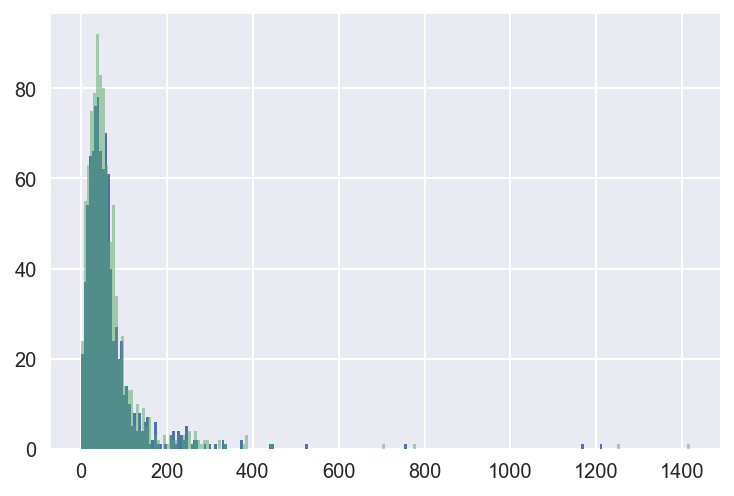

In [262]:
#area = df['Floor Area'].values
energy_2016 = ex_final['2016 Site EUI (kBtu/ft2)'].values
energy_2015 = ex_final['2015 Site EUI (kBtu/ft2)'].values
# energy_2014 = ex_final['2014 Site EUI (kBtu/ft2)'].values
# energy_2013 = ex_final['2013 Site EUI (kBtu/ft2)'].values

fig, ax = plt.subplots()
# ax.scatter(area, energy_2016)

# ax.set(xlabel='Area (sq ft)', ylabel='Site EUI (kBtu/ft2)',
#        title='Energy consumption for the year 2016')
# ax.grid()
ax.hist(energy_2016,bins = 200,alpha = 1)
ax.hist(energy_2015,bins = 200,alpha = 0.5)
# ax[1,0].hist(energy_2014,bins = 200,alpha = 1)
# ax[1,1].hist(energy_2013,bins = 200,alpha = 1)
# ax.hist(energy_2013,bins = 100)

#fig.savefig("test.png")
plt.show()

In [255]:
len(ex_final)

922

In [257]:
ex_final = pd.read_csv("NOn empty Valued buildings.csv")

years = ['2016','2015','2014','2013']
avg_energy = []
for column in ['2016 Site EUI (kBtu/ft2)',
               '2015 Site EUI (kBtu/ft2)','2014 Site EUI (kBtu/ft2)',
               '2013 Site EUI (kBtu/ft2)']:
    #print(column)
    counter = 0
    avg = 0
    for value in ex_final[column]:
        if float(value) == 0:
            counter +=1
        avg += float(value)
    print(counter)
    avg_energy.append(avg/(len(ex_final) - counter))
    
    

0
0
0
0


In [19]:
fig, ax = plt.subplots()
# ax.scatter(area, energy_2016)

ax.set(xlabel='Year', ylabel='Average Site EUI (kBtu/ft2)',
        title='Average Energy consumption over the years')

ax.plot(years,avg_energy,linewidth = 2)

fig.savefig("avg_over_the_years.png")
plt.show()

NameError: name 'plt' is not defined

In [206]:
ex_final = df[df['2016 Site EUI (kBtu/ft2)'] != 0] 
ex_final = ex_final[ex_final['2015 Site EUI (kBtu/ft2)'] != 0]
ex_final = ex_final[ex_final['2014 Site EUI (kBtu/ft2)'] != 0]
ex_final = ex_final[ex_final['2013 Site EUI (kBtu/ft2)'] != 0]


In [208]:
len(ex_final)
ex_final.to_csv("NOn empty Valued buildings.csv")

In [215]:
# ex_df = df[df['2016 Site EUI (kBtu/ft2)'] != 0]
# grouped_2016 = ex_df.groupby('Property Type - Self Selected')['2016 Site EUI (kBtu/ft2)'].sum().reset_index()
# ex = grouped_2016.sort_values('2016 Site EUI (kBtu/ft2)', ascending=False)[:10]

# ex = ex.reset_index(drop=True)
# ex

grouped_years = ex_final.groupby('Property Type - Self Selected')['2016 Site EUI (kBtu/ft2)',
                                                                '2015 Site EUI (kBtu/ft2)',
                                                                '2014 Site EUI (kBtu/ft2)',
                                                                '2013 Site EUI (kBtu/ft2)'].sum().reset_index()
ex = grouped_years.sort_values('2016 Site EUI (kBtu/ft2)', ascending=False)[:10]

ex = ex.reset_index(drop=True)
ex

,Property Type - Self Selected,2016 Site EUI (kBtu/ft2),2015 Site EUI (kBtu/ft2),2014 Site EUI (kBtu/ft2),2013 Site EUI (kBtu/ft2)
0,Office,26160.6,26653.2,26559.2,49491.5
1,Hotel,6303.1,6277.0,6320.3,6432.8
2,Supermarket/Grocery Store,4559.0,4671.4,4670.0,4791.4
3,Other,4015.8,4071.6,3730.8,3830.4
4,Retail Store,3131.0,3519.1,3543.9,3520.6
5,Mixed Use Property,2165.7,2188.7,2035.7,2258.7
6,Restaurant,1409.1,1567.1,4719.8,5052.5
7,Data Center,1280.4,1478.8,1459.7,995.2
8,College/University,1085.6,1071.9,877.6,1047.1
9,Medical Office,1037.8,1008.1,1011.1,1077.3


In [222]:
list(ex['2013 Site EUI (kBtu/ft2)'].values)

[49491.499999999971,
 6432.7999999999993,
 4791.4000000000005,
 3830.3999999999992,
 3520.6000000000013,
 2258.7000000000007,
 5052.5,
 995.19999999999993,
 1047.0999999999999,
 1077.3]

In [231]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure

output_file("bars.html")

properties = ['Office',
 'Hotel',
 'Supermarket/Grocery Store',
 'Other',
 'Retail Store',
 'Mixed Use Property',
 'Restaurant',
 'Data Center',
 'College/University',
 'Medical Office']
years = ['2013','2014','2015', '2016']

values_2016 = [int(value) for value in [26160.600000000017,6303.1000000000031,4559.0,4015.8000000000006,3131.0000000000005,2165.6999999999998,1409.0999999999999,1280.4000000000001,
 1085.5999999999999,1037.8]]
values_2015 = [int(value) for value in [26653.20000000003,6277.0000000000018,4671.4000000000005,4071.6000000000004,3519.0999999999999,2188.7000000000003,1567.0999999999999,
 1478.8,1071.9000000000001,1008.1000000000001]]
values_2014 =[int(value) for value in [26559.200000000023,6320.3000000000002,4670.0,3730.7999999999993,3543.9000000000001,2035.7000000000005,4719.8000000000011,
 1459.7,877.59999999999991,1011.0999999999999]]
values_2013 = [int(value) for value in [49491.499999999971,6432.7999999999993,4791.4000000000005,3830.3999999999992,3520.6000000000013,2258.7000000000007,5052.5,
 995.19999999999993,1047.0999999999999,1077.3]]


data = {'properties' : properties,
        '2013'   : values_2013,
        '2014'   : values_2014,
        '2015'   : values_2015,
        '2016'   : values_2016}

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [(prop, year) for prop in properties for year in years ]
counts = sum(zip(data['2013'], data['2014'], data['2015'], data['2016']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=250, title="Energy Consumption by property type per year",
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=0.9, source=source)


p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

In [238]:
[int(value) for value in [26653.20000000003,6277.0000000000018,4671.4000000000005,4071.6000000000004,3519.0999999999999,2188.7000000000003,1567.0999999999999,
 1478.8,1071.9000000000001,1008.1000000000001]]

[26653, 6277, 4671, 4071, 3519, 2188, 1567, 1478, 1071, 1008]

In [251]:
#output_file("bars.html")
from bokeh.io import export_png


fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
years = ['2015', '2016', '2017']

data = {'fruits' : fruits,
        '2015'   : [2, 1, 4, 3, 2, 4],
        '2016'   : [5, 3, 3, 2, 4, 6],
        '2017'   : [3, 2, 4, 4, 5, 3]}

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (fruit, year) for fruit in fruits for year in years ]
counts = sum(zip(data['2015'], data['2016'], data['2017']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=250, title="Fruit Counts by Year",
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=0.9, source=source)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)
#export_png(p, filename="plot.png")

In [243]:
zip(*(x))

In [266]:
crimedata = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2017_.csv')
crimedata2 = pd.DataFrame(crimedata['PdDistrict'].value_counts().astype(float))
crimedata2

,PdDistrict
SOUTHERN,28436.0
MISSION,21798.0
NORTHERN,21043.0
CENTRAL,19003.0
BAYVIEW,14003.0
TARAVAL,12145.0
INGLESIDE,11516.0
RICHMOND,9490.0
TENDERLOIN,8759.0
PARK,8580.0


In [11]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

neighbourhoods = pd.read_csv('SFFind_Neighborhoods.csv')
polygons = []
for dimension,nhood in zip(neighbourhoods['the_geom'],neighbourhoods['name']):
    lengths=dimension[16:-3].split(",")
    sides = []
    for length in lengths:
        side = length.strip().split(" ")
        side = [float(x) for x in side]
        sides.append(side)
    p = Polygon(sides)
    polygons.append((p,nhood))    

In [12]:
nhoods = []
for lati,longi in zip(ex_final['lat'],ex_final['long']):
    point = Point(longi,lati)
    #print(point)
    for p,name in polygons:
        #print(p,name)
        if p.contains(point):
            nhood = name
    nhoods.append(nhood)

In [13]:
ex_final['neighbourhood'] = nhoods

In [308]:
ex_final.to_csv('energy_withneighbourhoods.csv')

In [15]:
data2 = pd.DataFrame(ex_final.groupby('neighbourhood')['2015 Site EUI (kBtu/ft2)'].sum())
data2

,2015 Site EUI (kBtu/ft2)
neighbourhood,
Anza Vista,51.2
Apparel City,485.6
Aquatic Park / Ft. Mason,175.2
Balboa Terrace,52.9
Bayview,2010.8
Bernal Heights,321.5
Bret Harte,776.3
Castro,230.5
Cathedral Hill,813.4


In [18]:
import os

SF_COORDINATES = (37.76, -122.45)

# data2.to_json('nhoods.json')
# data2 = data2.reset_index()
# data2.columns = ['Neighbourhood', 'Energy Consumed']
 
# creation of the choropleth
for year in ['2016 Site EUI (kBtu/ft2)','2015 Site EUI (kBtu/ft2)','2014 Site EUI (kBtu/ft2)','2013 Site EUI (kBtu/ft2)','2012 Site EUI (kBtu/ft2)']:
    district_geo = os.path.join('/Users/BhavikaJalli/Documents/GitHub/Energy/','SF_Neighborhoods.geojson')
    data2 = pd.DataFrame(ex_final.groupby('neighbourhood')[year].sum())
    data2 = data2.reset_index()
    data2.columns = ['Neighbourhood', 'Energy Consumed']
    m= folium.Map(location=SF_COORDINATES, zoom_start=12)

    m.choropleth(
     geo_data=district_geo,
     name='Energy Consumed',
     data=data2,
     columns=['Neighbourhood', 'Energy Consumed'],
     key_on='feature.properties.name',
     fill_color='YlOrRd',
     fill_opacity=0.7,
     line_opacity=0.2,
     #popup ='feature.properties.name',
     legend_name='Energy Consumed per Neighbourhood'
    )
    #folium.LayerControl().add_to(m)

    # Save to html
    m.save('templates/maps/map_'+str(year[:4])+'_Region.html')


In [346]:
# for value in data2['Energy Consumed']:
#     print(value)
import json
data = json.loads(district_geo)
data

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [400]:
import os
district_geo = os.path.join('/Users/BhavikaJalli/Documents/GitHub/Energy/','SF_Neighborhoods.geojson')
SF_COORDINATES = (37.76, -122.45)

# data2.to_json('nhoods.json')
# data2 = data2.reset_index()
# data2.columns = ['Neighbourhood', 'Energy Consumed']
 
# creation of the choropleth
m= folium.Map(location=SF_COORDINATES, zoom_start=12)
m.save('SF.html')
m